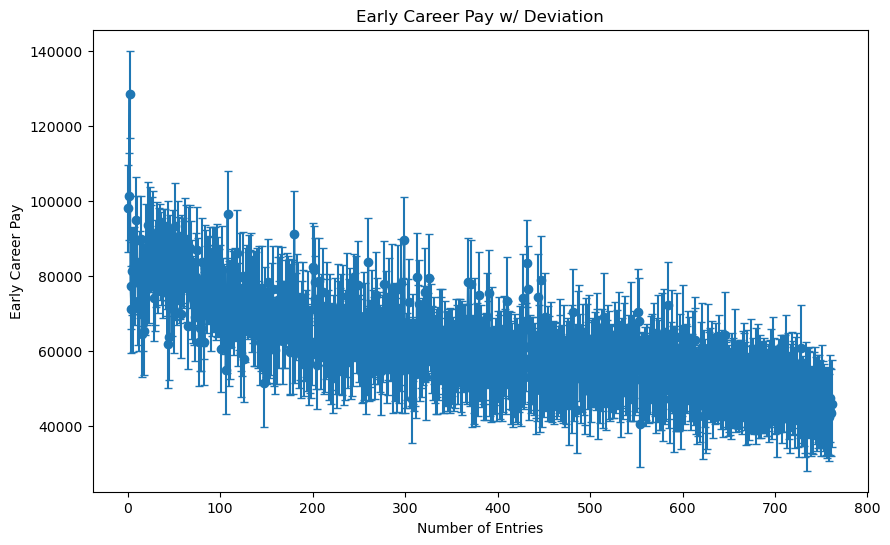

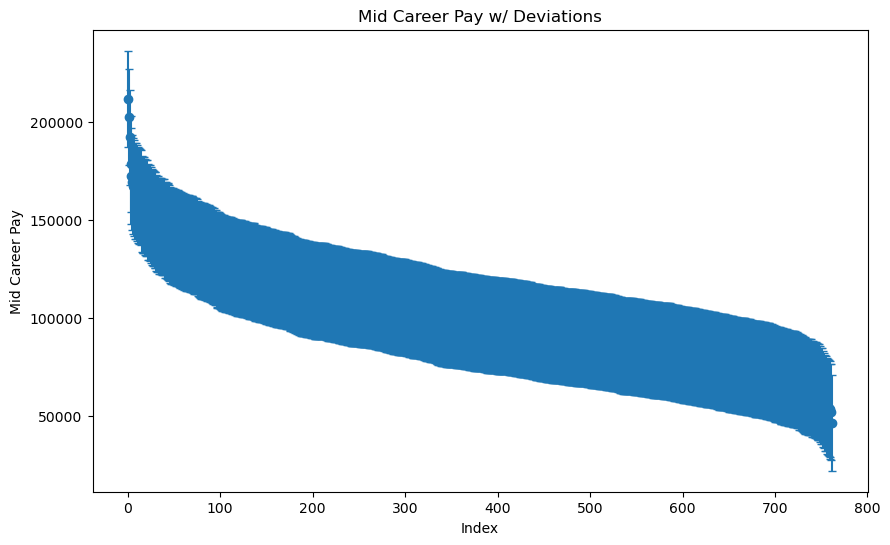

In [47]:
import pandas as pd
import math
import matplotlib.pyplot as plt

file = pd.read_csv("final-post-college-salaries.csv")
#finding column names
file_preview = file.head
#print(file)

#turning the columns into only numbers
file['Early Career Pay'] = file['Early Career Pay'].replace(r'[|\$,]', '', regex=True)
file['Mid-Career Pay'] = file['Mid-Career Pay'].replace(r'[\$,]', '', regex=True)

#turning the columns into numeric data 
file['Early Career Pay'] = pd.to_numeric(file['Early Career Pay'],errors='coerce')
file['Mid-Career Pay']= pd.to_numeric(file['Mid-Career Pay'],errors='coerce')

#finding the data at the bottom and top 1%, and quartiles
early_quantiles = file['Early Career Pay'].quantile([0.01,0.25, 0.5, 0.75,0.99])
mid_quantiles = file['Mid-Career Pay'].quantile([0.01,0.25,0.50,0.75,0.99])

#values of their respective columns
early_set = file['Early Career Pay'].iloc[0:]
mid_set = file['Mid-Career Pay'].iloc[0:]

#defining the average pay
def average_pay(early,mid):
    """function to find average pay"""
    avg_early = early.mean()
    avg_mid = mid.mean()
    return math.floor(avg_early),math.floor(avg_mid)

#defining the std of both indices
def std_pay(early,mid):
    """function to find std of data set"""
    std_early = early.std()
    std_mid = mid.std()
    return std_early, std_mid

avg_early,avg_mid = average_pay(early_set,mid_set)
std_early,std_mid = std_pay(early_set,mid_set)


#creating line plots for early career pay data
plt.figure(figsize=(10,6))
plt.errorbar(
    x=range(len(early_set)),
    y=early_set,
    yerr=std_early,
    fmt='-o',
    capsize=3,
    label='Early Career Pay',
)
plt.xlabel("Number of Entries")
plt.ylabel("Early Career Pay")
plt.title("Early Career Pay w/ Deviation")
plt.show()

#creating line plot for mid career pay data 
plt.figure(figsize=(10,6))
plt.errorbar(
    x=range(len(mid_set)),
    y=mid_set,
    yerr=std_mid,
    fmt='-o',
    capsize=3,
    label='Mid Career Pay'
)
plt.xlabel("Number of Entries")
plt.ylabel("Mid Career Pay")
plt.title("Mid Career Pay w/ Deviations")
plt.show()




    
    
    
    